In [7]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import ipywidgets as widgets
import time
import math
from IPython.display import display

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
Res=100 #Resoultion of the calulations

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


# Homework 5
## Plot Figure 3.5 for k=1.2 and an epsilon of 50.

## Plot Figure 3.6 for k=1.2 and P1/P3=100.

## Complete Example 3.2 and recreate Figure 3.3 using the information from Example 3.2

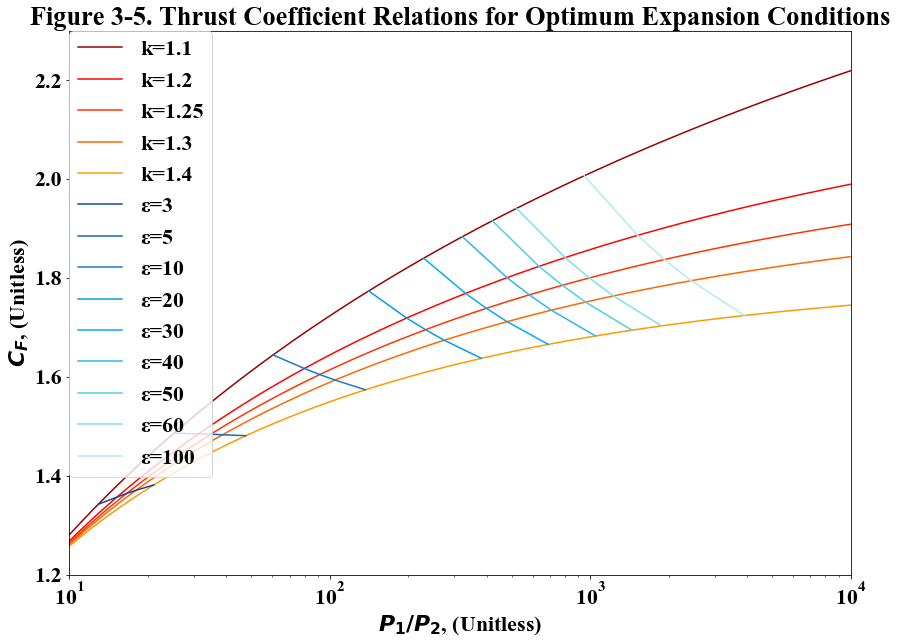

In [8]:
#Homework 5

  #Equations + Definitions
def CF_ideal(k,p2p1):
    CF=(((2*k**2)/(k-1))*(2/(k+1))**((k+1)/(k-1))*(1-(p2p1)**((k-1)/k)))**0.5
    return CF
def AreaRatio(k,p2p1):
    AR=((k+1)/2)**(1/(k-1))*(p2p1)**(1/k)*(((k+1)/(k-1))*(1-p2p1**((k-1)/k)))**0.5
    AR=AR**-1
    return AR
def FindEpsln(numbers,eps):   
    numbers = np.asarray(numbers) 
    i=(np.abs(numbers - eps)).argmin() 
    return numbers[i]       

#Color Codes for Graph
h_color=['#990000','#FF0000','#FF3300','#FF6600','#FF9900'] #Reds
b_color=['#0d47a1','#1565c0','#1976d2','#039be5','#03a9f4','#29b6f6','#4dd0e1','#80deea','#b2ebf2'] #Blues

#Plotting k Values
Kay=[1.1,1.2,1.25,1.3,1.4] #Range of Ratio of Specific Heats | Unitless
color=0 #Reseting Custom Color Code
for k in Kay:
        P1_P2=np.arange(10.0,10000.1,0.1)
        P2_P1=P1_P2**(-1)
        CF=CF_ideal(k,P2_P1)
        k_lab="k="+ str(k)
        plt_color=h_color[color]
        color=color+1
        plt.plot(P1_P2,CF,color=(plt_color),label=(k_lab))

#Plotting Epsilon Values
Eps=[3,5,10,20,30,40,50,60,100] #Range of Epsilon Values | Unitless
color=0 #Reseting Custom Color Code
for x in Eps:
        ε=x
        CF_coords=[]
        P_coords=[]
        for k in Kay:
            AR=AreaRatio(k,P2_P1)
            AR=AR.tolist()
            CF_coords.append(CF_ideal(k,P2_P1[AR.index(FindEpsln(AR,ε))]))
        for k in Kay:
            AR=AreaRatio(k,P2_P1)
            AR=AR.tolist()
            P_coords.append(P1_P2[AR.index(FindEpsln(AR,ε))])
        ε_lab="ε="+str(ε)
        plt_color=b_color[color]
        color=color+1
        plt.plot(P_coords,CF_coords,color=(plt_color),label=ε_lab)

#Formatting the Graph
plt.legend(loc='upper left', borderaxespad=0.) #Showing the Graph Legend
plt.xlabel('$P_1/P_2$, (Unitless)')                        #Setting the X label
plt.ylabel('$C_F$, (Unitless)')                            #Setting the Y label
plt.legend(loc='best', borderaxespad=0.)       #Showing the Graph Legend
plt.xlim([10,10000])                           #Setting the range for the X-axis
plt.ylim([1.2,2.3])                            #Setting the range for the Y-axis
plt.xscale('log')                              #Setting the X scale to log
plt.title('Figure 3-5. Thrust Coefficient Relations for Optimum Expansion Conditions')
plt.show()

# Example 3.2

### A rocket propulsion system operates near sea level with a chamber pressure of p1 = 2.068 MPa or 300 psia, a chamber temperature of 2222 K, and a propellant consumption of ṁ = 1.0 kg∕sec. Take k = 1.30 and R = 345.7 J∕kg − K. Calculate the ideal thrust and the ideal specific impulse. Also plot the cross-sectional area A, the local velocity 𝑣, the specific volume V, the absolute temperature T, and the local Mach number M with respect to pressure along the nozzle.

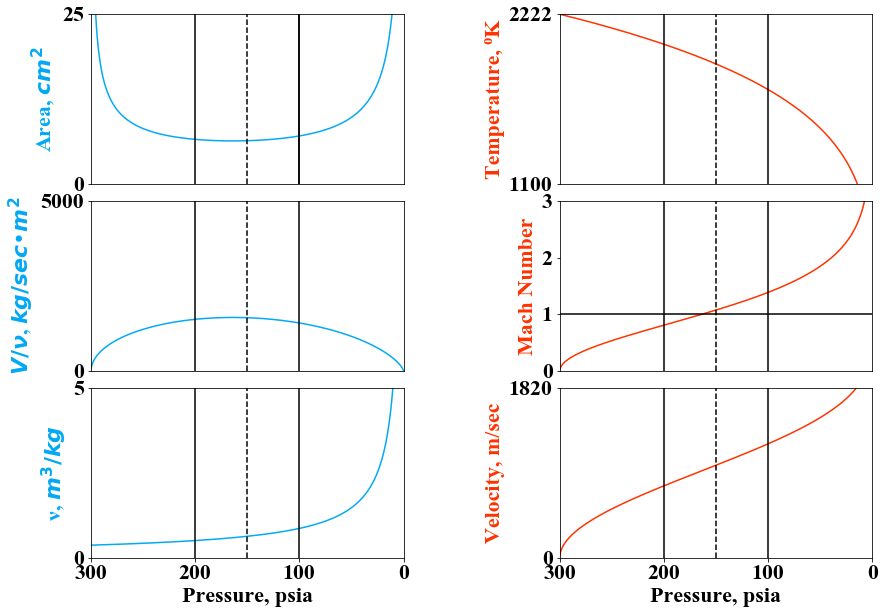

In [9]:
#Example 3.2

#Definitions
def IdealV2 (k,R,T1,PR):
    V2=np.sqrt(((2*k)/(k-1))*R*T1*(1-(PR)**((k-1)/k)))
    return V2

#Given
P1=2068000 #Chamber Pressure | Pa
T1=2222    #Chamber Pressure | ⁰K
m_=1       #Propellant consumption | kg/sec
k=1.3      #Specific Heat Ratio
R=345.7    #Universial Heat Constant | J/kg-K
go=9.81    #Gravitational Constant | m/sec^2
P3=101300  #Sea-level Pressure | Pa
PR=P3/P1   #Pressure Ratio | P2/P1

#Calculations
V2=IdealV2(k,R,T1,PR)
c=V2                                     #P2=P3, Effective Exhaust Velocity | m/sec
Isp=c/go                                 #Specific Impulse | Sec
ν1=R*T1/P1                               #Initial Specific Volume | m^3/kg
Py=np.linspace(3000000,0,1000)           #Range of Pressure between 2.068-0.1013 MPA | Pa
νy=(ν1)*(((P1+0.001)/(Py+0.001))**(1/k))     #Specific Volume as function of Py | m^3/kg
Ty=T1*((Py+0.001)/(P1+0.001))**((k-1)/k) #Temperature as function of Py | K
Vy=np.sqrt(((2*k)/(k-1))*R*T1*abs(1-((Py+0.001)/(P1+0.001))**((k-1)/k)))   #Velocity as function of Py | m/sec
Ay=m_*(νy/Vy)                            #Cross-Sectional Area | m^2
My=(Vy)/np.sqrt(k*R*Ty)                    #Mach Number | Unitless

#Conversions
Py1=Py*0.000145038                       #Converting Pa to psia
Ay1=Ay*100*100                           #Converting m^2 to cm^2

#Creating the Plots + Space Formatting
fig, axs = plt.subplots(3, 2)
matplotlib.pyplot.subplots_adjust(wspace=0.5,hspace=0.1) #Formatting the Graphs for No Overlap

#Plot of Pressure and Area
color='#03a9f4'
axs[0,0].plot(Py1,Ay1,color=color)
axs[0,0].set_xlim([300,0])
axs[0,0].set_ylim([0,25])
axs[0,0].set_yticks(np.arange(0, 26, step=25))
axs[0,0].set_xticks([])
axs[0,0].axvline(x=200, color='k')
axs[0,0].axvline(x=150, color='k', linestyle='--')
axs[0,0].axvline(x=100, color='k')
axs[0,0].axvline(x=100, color='k')
axs[0,0].set_ylabel('Area, $cm^2$', color=color)

#Plot of Pressure and Velocity over Specific Volume
color='#03a9f4'
axs[1,0].plot(Py1,Vy/νy,color=color)
axs[1,0].set_xlim([300,0])
axs[1,0].set_ylim([0,5000])
axs[1,0].set_yticks(np.arange(0, 5001, step=5000))
axs[1,0].set_xticks([])
axs[1,0].axvline(x=200, color='k')
axs[1,0].axvline(x=150, color='k', linestyle='--')
axs[1,0].axvline(x=100, color='k')
axs[1,0].set_ylabel('$V/ν$, $kg/sec•m^2$', color=color)

#Plot of Pressure and Specific Volume
color='#03a9f4'
axs[2,0].plot(Py1,νy,color=color)
axs[2,0].set_xlim([300,0])
axs[2,0].set_ylim([0,5])
axs[2,0].set_yticks(np.arange(0, 6, step=5))
axs[2,0].set_xticks(np.arange(0, 301, step=100))
axs[2,0].axvline(x=200, color='k')
axs[2,0].axvline(x=150, color='k', linestyle='--')
axs[2,0].axvline(x=100, color='k')
axs[2,0].set_xlabel('Pressure, psia')
axs[2,0].set_ylabel('ν, $m^3/kg$', color=color)

#Plot of Pressure and Temperature
color='#FF3300'
axs[0,1].plot(Py1,Ty,color=color)
axs[0,1].set_xlim([300,0])
axs[0,1].set_ylim([1100,2222])
axs[0,1].set_xticks([])
axs[0,1].set_yticks(np.arange(1100, 2223, step=1122))
axs[0,1].axvline(x=200, color='k')
axs[0,1].axvline(x=150, color='k', linestyle='--')
axs[0,1].axvline(x=100, color='k')
axs[0,1].set_ylabel('Temperature, ⁰K', color=color)

#Plot of Pressure and Mach Number
color='#FF3300'
axs[1,1].plot(Py1,My,color=color)
axs[1,1].set_xlim([300,0])
axs[1,1].set_ylim([0,3])
axs[1,1].set_xticks([])
axs[1,1].set_yticks(np.arange(0, 4, step=1))
axs[1,1].axhline(y=1, color='k')
axs[1,1].axvline(x=200, color='k')
axs[1,1].axvline(x=150, color='k', linestyle='--')
axs[1,1].axvline(x=100, color='k')
axs[1,1].set_ylabel('Mach Number', color=color)

#Plot of Pressure and Velocity
color='#FF3300'
axs[2,1].plot(Py1,Vy,color=color)
axs[2,1].set_xlim([300,0])
axs[2,1].set_ylim([0,1820])
axs[2,1].set_yticks(np.arange(0, 1821, step=1820))
axs[2,1].set_xticks(np.arange(0, 301, step=100))
axs[2,1].axvline(x=200, color='k')
axs[2,1].axvline(x=150, color='k', linestyle='--')
axs[2,1].axvline(x=100, color='k')
axs[2,1].set_xlabel('Pressure, psia')
axs[2,1].set_ylabel('Velocity, m/sec', color=color)

plt.show()